In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/world_population.csv")

In [3]:
df.shape

(234, 17)

In [4]:
df.sample(5)

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
29,175,BRN,Brunei,Bandar Seri Begawan,Asia,449002,441725,421437,396053,333926,261928,187921,133343,5765,77.8841,1.0081,0.01
213,18,TUR,Turkey,Ankara,Asia,85341241,84135428,79646178,73195345,64113547,54324142,44089069,35540990,783562,108.9145,1.0067,1.07
22,206,BMU,Bermuda,Hamilton,North America,64184,64031,63144,63447,61371,57470,53565,52019,54,1188.5926,1.0000,0.00
229,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,11572,11655,12182,13142,14723,13454,11315,9377,142,81.4930,0.9953,0.00
176,220,MAF,Saint Martin,Marigot,North America,31791,32552,35020,36458,29610,28127,7776,5802,53,599.8302,0.9951,0.00


In [5]:
# Using transpose of the dataframe is useful when there are lots of features to describe
# as it swaps the place of columns and rows and we can see the data points easily
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,234.0,1.175000e+02,6.769417e+01,1.0000,59.250000,1.175000e+02,1.757500e+02,2.340000e+02
2022 Population,234.0,3.407441e+07,1.367664e+08,510.0000,419738.500000,5.559944e+06,2.247650e+07,1.425887e+09
2020 Population,234.0,3.350107e+07,1.355899e+08,520.0000,415284.500000,5.493074e+06,2.144798e+07,1.424930e+09
2015 Population,234.0,3.172996e+07,1.304050e+08,564.0000,404676.000000,5.307400e+06,1.973085e+07,1.393715e+09
2010 Population,234.0,2.984524e+07,1.242185e+08,596.0000,393149.000000,4.942770e+06,1.915957e+07,1.348191e+09
2000 Population,234.0,2.626947e+07,1.116982e+08,651.0000,327242.000000,4.292907e+06,1.576230e+07,1.264099e+09
1990 Population,234.0,2.271022e+07,9.783217e+07,700.0000,264115.750000,3.825410e+06,1.186923e+07,1.153704e+09
1980 Population,234.0,1.898462e+07,8.178519e+07,733.0000,229614.250000,3.141146e+06,9.826054e+06,9.823725e+08
1970 Population,234.0,1.578691e+07,6.779509e+07,752.0000,155997.000000,2.604830e+06,8.817329e+06,8.225344e+08
Area (km²),234.0,5.814494e+05,1.761841e+06,1.0000,2650.000000,8.119950e+04,4.304258e+05,1.709824e+07


In [10]:
numeric_features = df.select_dtypes(include='number').columns.tolist()
df[numeric_features].corr() 

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
Rank,1.000000,-0.358361,-0.355854,-0.351222,-0.347461,-0.341057,-0.336152,-0.335246,-0.335379,-0.383774,0.129436,-0.224561,-0.358464
2022 Population,-0.358361,1.000000,0.999946,0.999490,0.998629,0.994605,0.987228,0.980285,0.973162,0.453411,-0.027618,-0.020863,0.999999
2020 Population,-0.355854,0.999946,1.000000,0.999763,0.999105,0.995583,0.988724,0.982121,0.975254,0.454993,-0.027358,-0.025116,0.999944
2015 Population,-0.351222,0.999490,0.999763,1.000000,0.999783,0.997340,0.991594,0.985724,0.979414,0.458240,-0.026857,-0.032154,0.999487
2010 Population,-0.347461,0.998629,0.999105,0.999783,1.000000,0.998593,0.993929,0.988786,0.983042,0.461936,-0.026505,-0.037983,0.998626
2000 Population,-0.341057,0.994605,0.995583,0.997340,0.998593,1.000000,0.998336,0.995160,0.990956,0.473933,-0.026139,-0.050515,0.994598
1990 Population,-0.336152,0.987228,0.988724,0.991594,0.993929,0.998336,1.000000,0.999042,0.996602,0.486764,-0.026224,-0.062397,0.987218
1980 Population,-0.335246,0.980285,0.982121,0.985724,0.988786,0.995160,0.999042,1.000000,0.999194,0.498166,-0.026587,-0.072349,0.980273
1970 Population,-0.335379,0.973162,0.975254,0.979414,0.983042,0.990956,0.996602,0.999194,1.000000,0.509940,-0.026881,-0.081313,0.973150
Area (km²),-0.383774,0.453411,0.454993,0.458240,0.461936,0.473933,0.486764,0.498166,0.509940,1.000000,-0.063128,-0.013970,0.453284


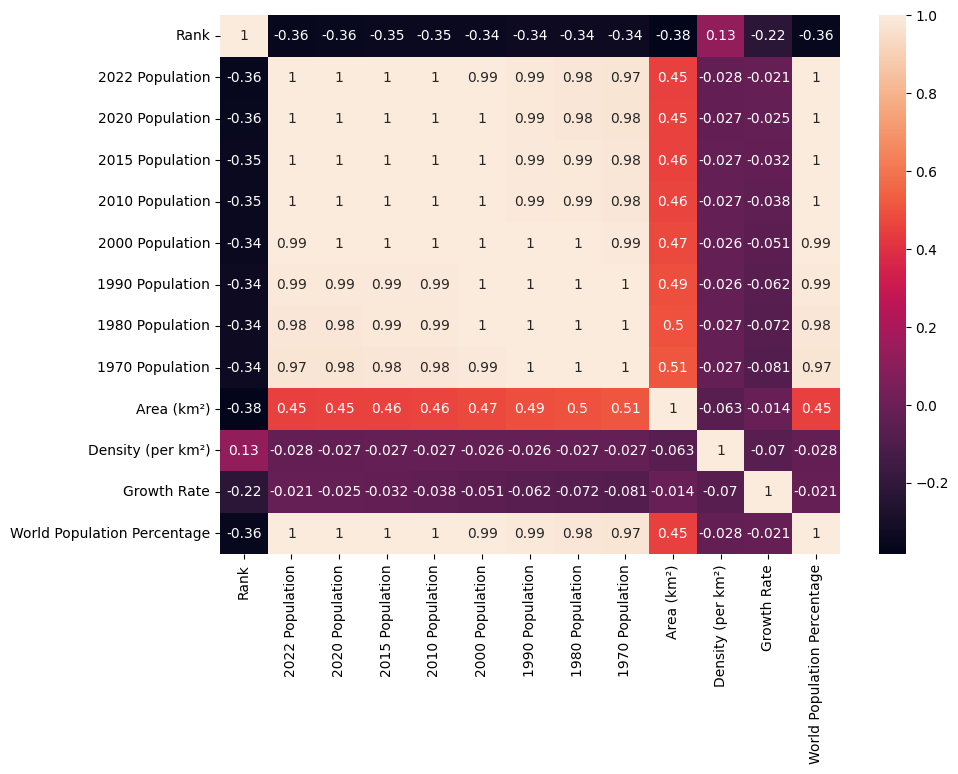

In [19]:
plt.figure(figsize=(10, 7))
sns.heatmap(df[numeric_features].corr(), annot=True)
plt.show()

We can see that population in a given year is highly correlated to population in some other year, hence the correlation of approximately 1.
For machine learning training, we would not want a column in our data to either have a high correlation (close to 1 or -1 means that data is kind of duplicated and we are not adding useful data to the training) or no correlation at all (close to 0 means that this column is irrelevant). 

In [20]:
# Checking for duplicates
# df.duplicated() returns True or False for each row. To check if we have a duplicated row, we sum up all True (1) and False (0) values and check the final aggregated result. If the value is above zero, then we know there is a duplicated row somewhere in between.
# We can remove the duplicates with df.remove_duplicates().
df.duplicated().sum()

np.int64(0)

In [22]:
df.isnull().sum()

Rank                           0
CCA3                           0
Country/Territory              0
Capital                        0
Continent                      0
2022 Population                0
2020 Population                0
2015 Population                0
2010 Population                0
2000 Population                0
1990 Population                0
1980 Population                0
1970 Population                0
Area (km²)                     0
Density (per km²)              0
Growth Rate                    0
World Population Percentage    0
dtype: int64

## Null Handling
We don't have null or NaN data points here in this dataset, but let's explore the null handling methods:

- Dropping the row (`df.dropna()`): It depends on the data itself. In this case we can't really drop a row, as wiping out a country's information out of existence because we did not know its 2025 population is not a good idea.
- Dropping the column (`df.dropna(axis=1)`): We can drop a column if most of its data points are null. Though, we want to squeeze all the information out of dataset for machine learning training and dropping a column is not a good idea.
- Imputing with mean or median for numeric values: We wouldn't want to use mean for imputing population, because a country like China has a population of 1.5 billion, and then we have a country that has 1 million, so imputing an average wouldn't be so accurate. In this case we can use median. 
```python
df = df[numeric_features].fillna(df[numeric_features].mean())
```
- Imputing with mode for object values: We can use mode to impute a value for a string column.
- Impute using KNN: Looking at the nearest neighbors and filling the null data points based on the neighbors. KNN is only used for numerical values.
```python
import pandas as pd
from sklearn.impute import KNNImputer
knnimp = KNNImputer(n_neighbors=3)
res = knnimp.fit_transform(df[numeric_features])
df_numeric = pd.DataFrame(res)
df = pd.concat(df[categorical_features], df_numeric)
```

In [25]:
def visualize_numerical_distribution(df):
    num_cols = 3
    num_rows = (len(df.columns) + num_cols - 1) // num_cols
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 5 * num_rows))
    fig.suptitle('Distribution of numerical features')
    
    axes = axes.flatten()
    
    for i, col in enumerate(df):
      sns.histplot(df[col], kde=True, ax=axes[i], color="skyblue", element="step", stat="density")
      axes[i].set_title(f'Distribution of {col}')
      axes[i].set_xlabel(col)
      axes[i].set_ylabel('Density')

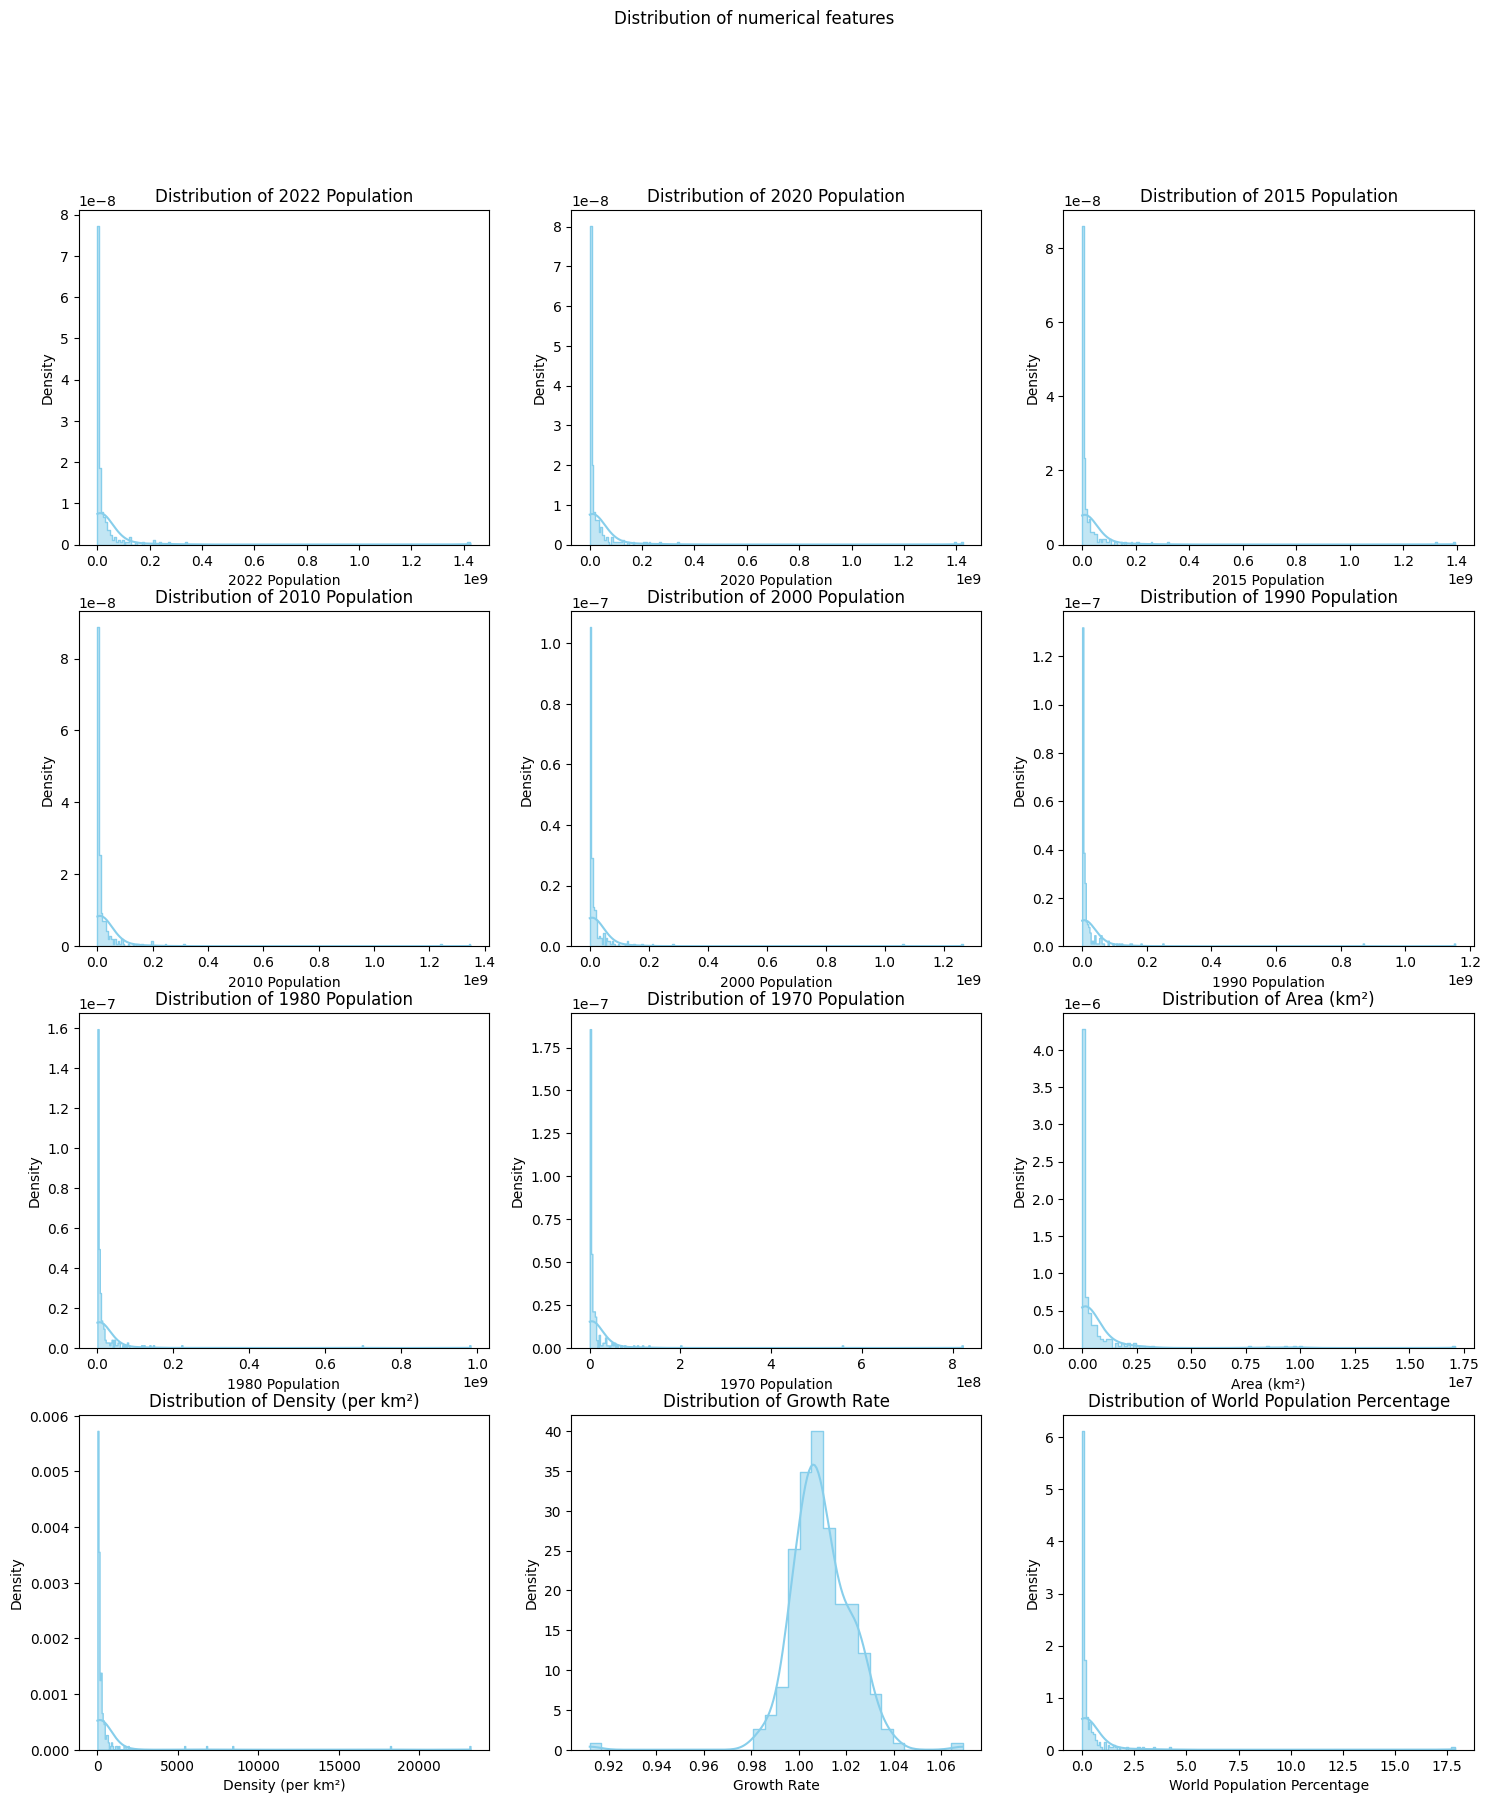

In [28]:
visualize_numerical_distribution(df[numeric_features].drop(['Rank'], axis=1))

## Handling Skewness
Skewness is going to be fully covered in later modules, as in this module we are just going to get an initial introduction of it.

We use logarithm or square root functions to normalize the dataset. We can also use a package called `boxcox`.

In [30]:
from scipy.stats import boxcox

def handle_skewness(dataframe, threshold=2.0, shift_constant = 1):
    df = dataframe.copy()
    lamda_dict = {}
    
    for col in df:
        skewness = df[col].skew()
        if skewness > threshold:
            min_val = df[col].min()
            
            if min_val <= 0:
                shift = abs(min_val) + shift_constant
                df[col] = df[col] + shift
                
            df[col], fitted_lambda = boxcox(df[col])
            lamda_dict[col] = fitted_lambda
        
    return df, lamda_dict

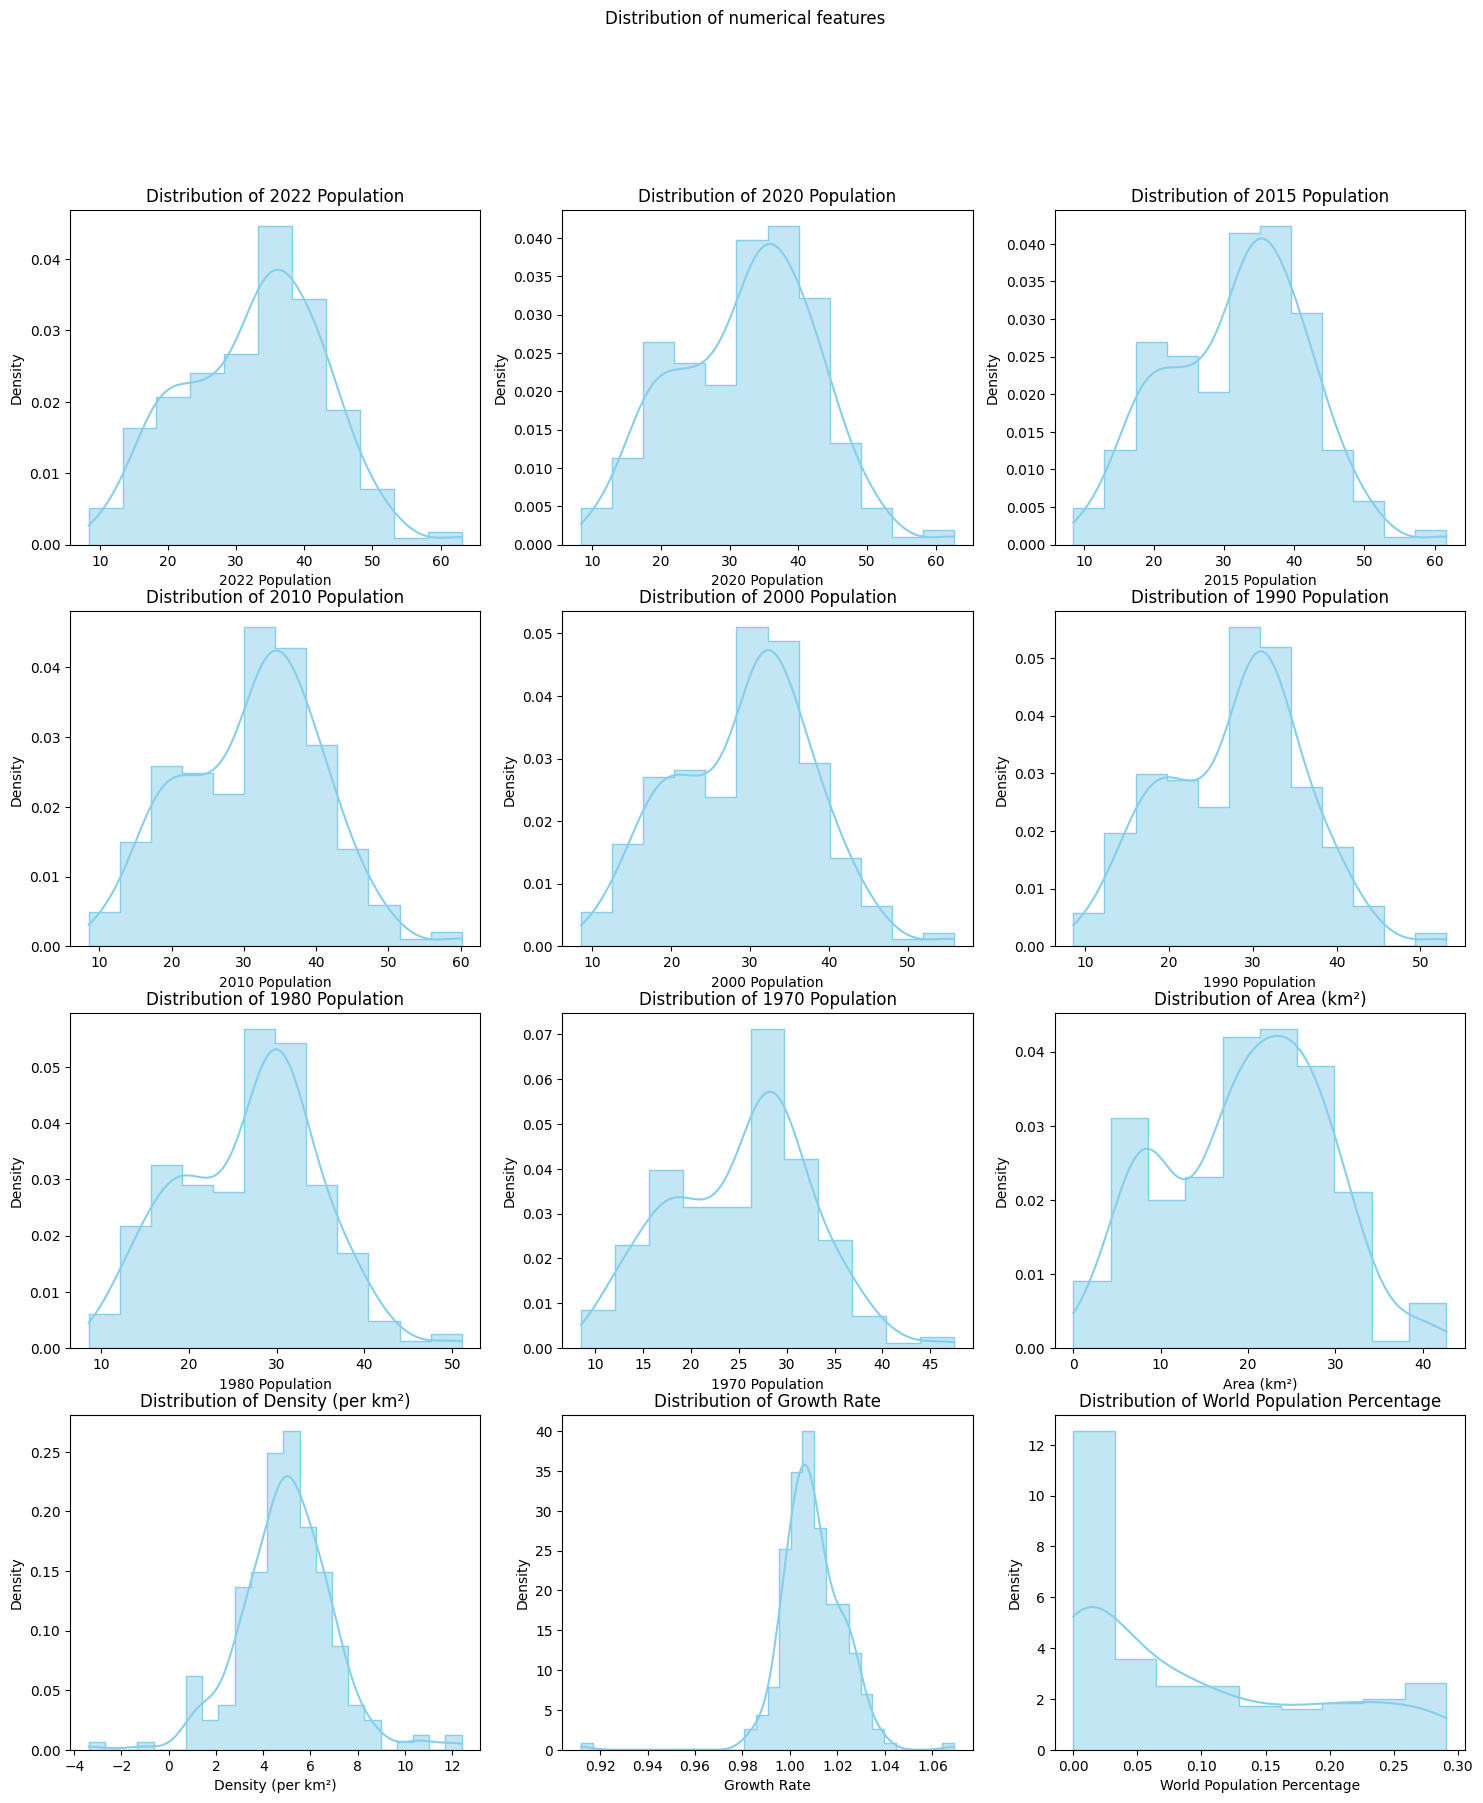

In [36]:
skewHandledDf, _ = handle_skewness(df[numeric_features].drop(['Rank'], axis=1))
visualize_numerical_distribution(skewHandledDf)

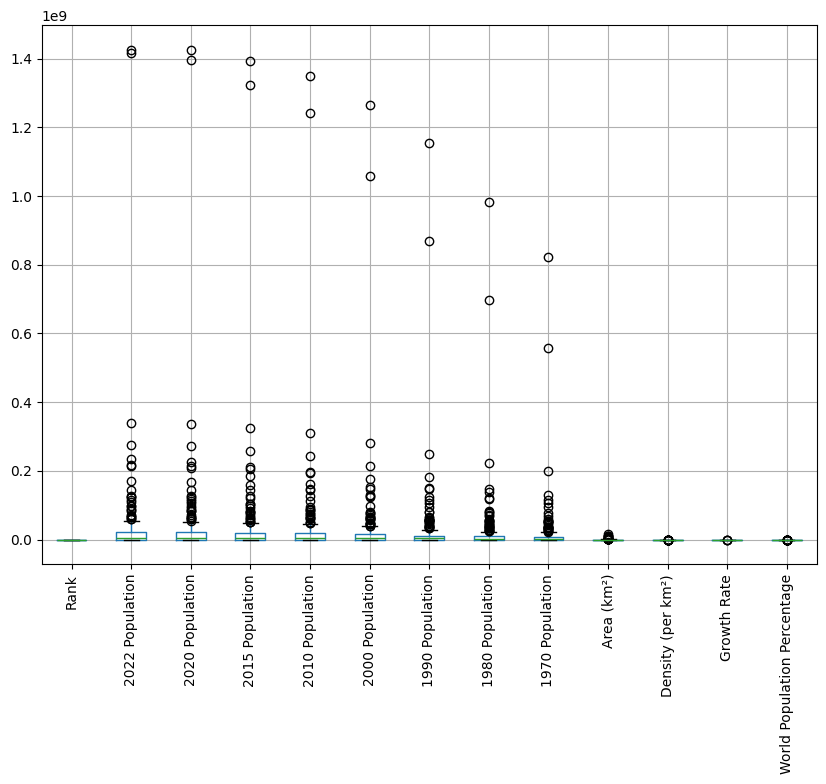

In [37]:
plt.figure(figsize=(10, 7))
df.boxplot()
plt.xticks(rotation=90)
plt.show()


## Outliers
Some countries like China and India are present in the boxplot as the outliers. Unlike other scenarios we would not want to remove outliers as we can't really manipulate the population of the globe😅

## Advanced Filtering
Next step, we take a look at advanced filtering.

In [45]:
# Returning `2022 Population`, `Country`, and `Area (km2)` columns for countries that have over 80 million population and area of over 1.5 million square kilometers.
df.loc[(df['2022 Population'] > 0.8e8) & (df['Area (km²)'] > 1.5e6), ['2022 Population', 'Country/Territory', 'Area (km²)']].sort_values('2022 Population', ascending=False)

,2022 Population,Country/Territory,Area (km²)
41,1425887337,China,9706961
92,1417173173,India,3287590
221,338289857,United States,9372610
93,275501339,Indonesia,1904569
27,215313498,Brazil,8515767
171,144713314,Russia,17098242
131,127504125,Mexico,1964375
55,99010212,DR Congo,2344858
94,88550570,Iran,1648195


In [47]:
# Returning the countries that are located in Asia and their population has dwindled through 2020 to 2022.
df[(df['Continent'] == 'Asia') & (df['2022 Population'] < df['2020 Population'])][['Country/Territory', '2020 Population', '2022 Population']]

,Country/Territory,2020 Population,2022 Population
9,Armenia,2805608,2780469
15,Bahrain,1477469,1472233
73,Georgia,3765912,3744385
89,Hong Kong,7500958,7488865
102,Japan,125244761,123951692
108,Kuwait,4360444,4268873
112,Lebanon,5662923,5489739
167,Qatar,2760385,2695122
194,South Korea,51844690,51815810


In [49]:
# Returning the aggregated population for each continent
population_agg = df.groupby('Continent')['2022 Population'].agg(['sum', 'mean', 'median']).reset_index()
population_agg.columns = ['Continent', 'Total Population', 'Mean Population', 'Median Population']
population_agg.sort_values('Total Population', ascending=False)

,Continent,Total Population,Mean Population,Median Population
1,Asia,4721383274,9.442767e+07,18082920.0
0,Africa,1426730932,2.503037e+07,13352864.0
2,Europe,743147538,1.486295e+07,5228714.0
3,North America,600296136,1.500740e+07,236399.0
5,South America,436816608,3.120119e+07,15112555.0
4,Oceania,45038554,1.958198e+06,114164.0
